In [1]:
# for each of tile:
# convert the visium hd data to the baysor format
#

In [ ]:
from tabnanny import verbose
from __future__ import annotations
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from stardist.models import StarDist2D
# Import the package from the src directory
import openslide
from skimage.color import rgb2gray
import cv2

from anndata import AnnData

cwd_path = Path.cwd()
root_path = cwd_path.parent



package_path = root_path / "src"

sys.path.append(str(package_path))

import CapybaraHD.process_histology.process_wsi as cp_process_wsi
import CapybaraHD.process_adata.read_adata as cp_read_adata
import CapybaraHD.map.map_wsi as cp_map_wsi

In [3]:
wsi_folder = Path('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan')
cellranger_folder = Path('/dfs9/stanlewn-lab/share/Elvin_Tapestri/Visium_HD/WagenblastHD2/bings.mssm.edu/bings_mssm_edu/bings_omics/published_data/poddan01/external/elvin_wagenblast/WagenblastHD/WagenblastHD2/cellranger_output/ELWA02_FL3_0_v1')


slide_f, adata_folder = wsi_folder/'FL3.svs', cellranger_folder

elvin_fl3 = cp_read_adata.VisiumHDB2C(out_10x_folder=Path(adata_folder))

adata = elvin_fl3.get_um_adata(2)






The inferred 10x output name is ELWA02_FL3_0_v1
Loading square_002um data


anndata.py (1758): Variable names are not unique. To make them unique, call `.var_names_make_unique`.
anndata.py (1758): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


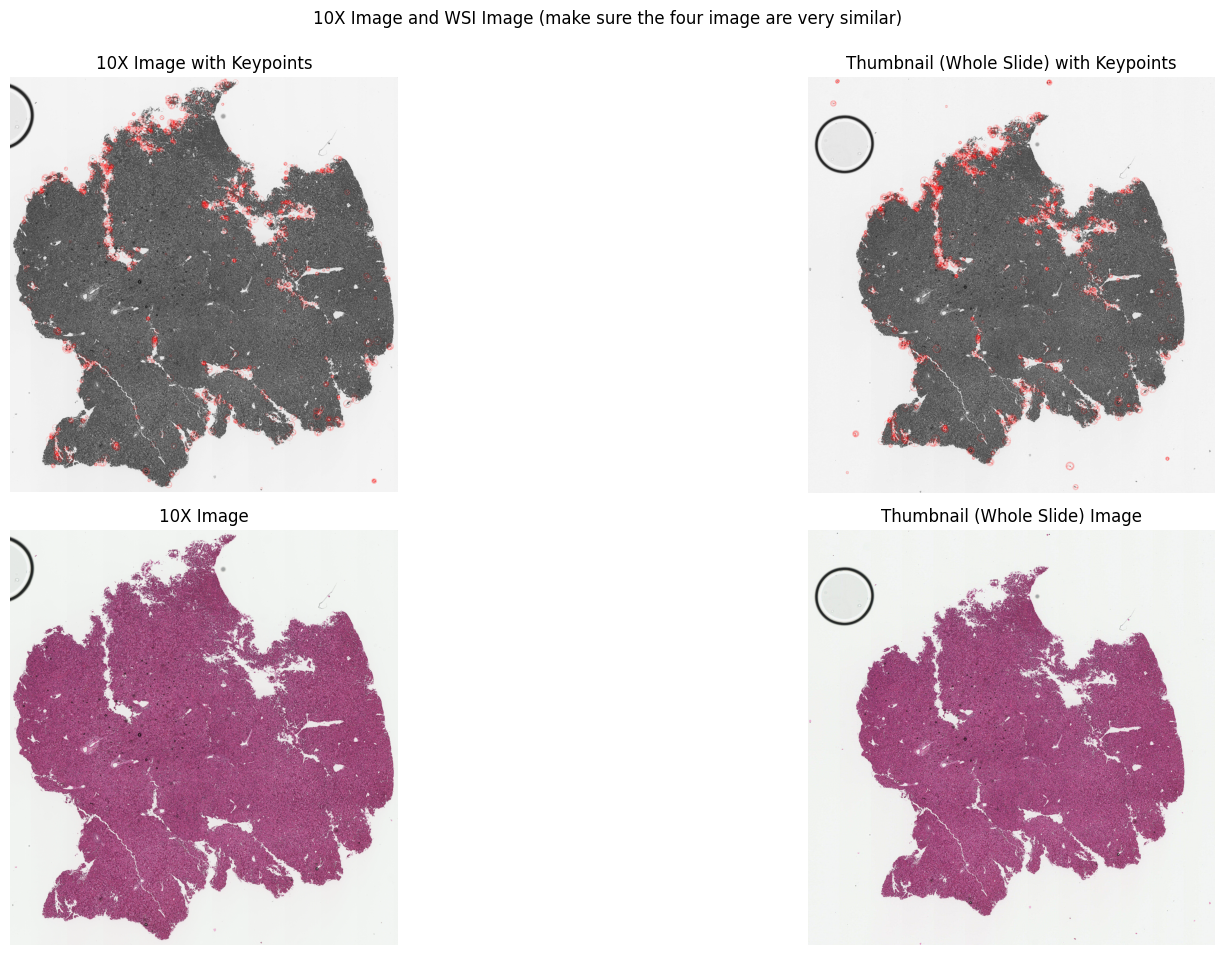

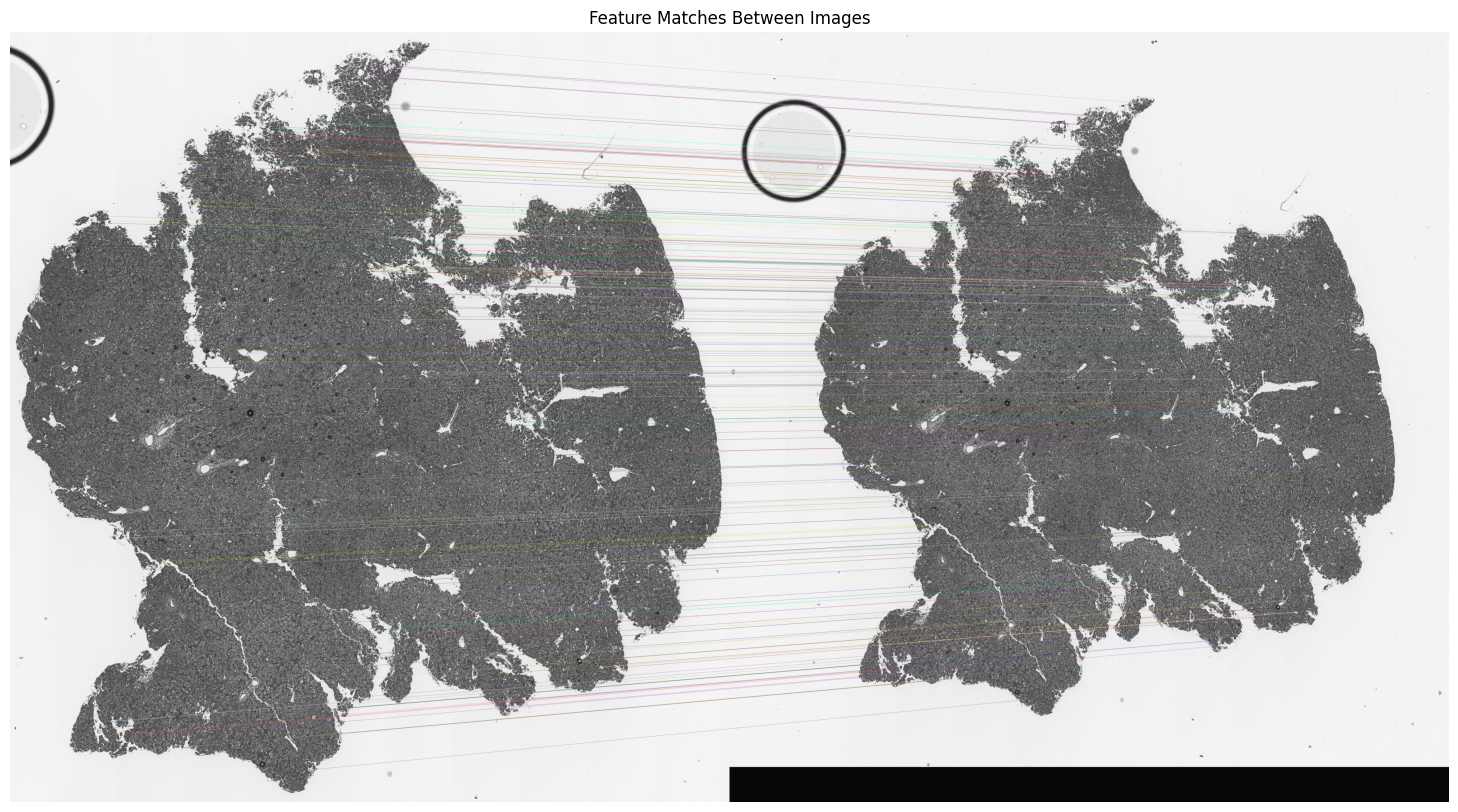

Homography matrix:
[[ 1.21548207e+00  1.62970565e-05 -7.57851466e+02]
 [-5.65103534e-05  1.21577213e+00 -5.47151036e+02]
 [-3.60391523e-08  3.50237937e-08  1.00000000e+00]]


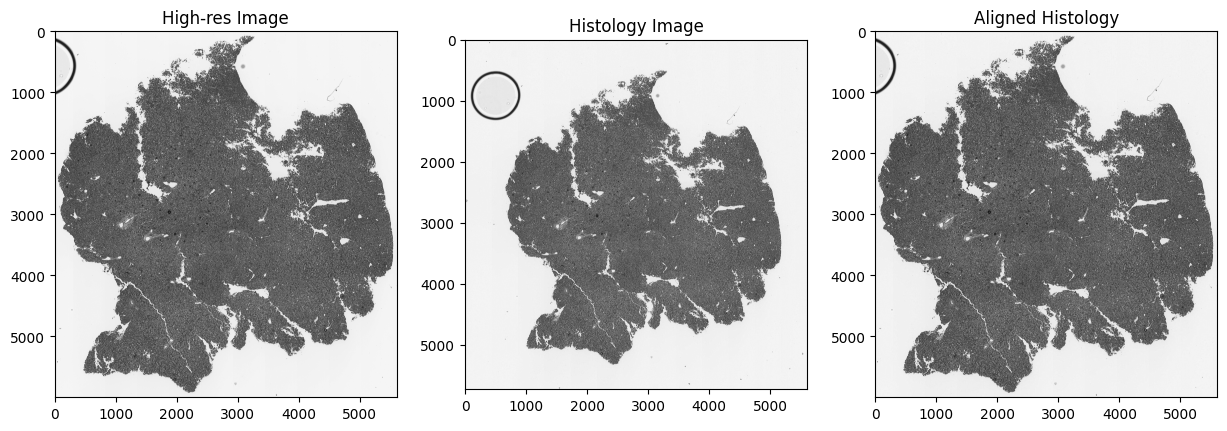

In [4]:
premaping = cp_map_wsi.PreprocessAdataImage(adata, slide_f)


In [5]:
vars(premaping)

{'adata': AnnData object with n_obs × n_vars = 4638180 × 18085
     obs: 'in_tissue', 'array_row', 'array_col', 'spatial_sample_id'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 'wsi_slide': PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'adata_image': <PIL.Image.Image image mode=RGB size=5606x6000>,
 'slide': OpenSlide(PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs')),
 'slide_thumbnail': <PIL.Image.Image image mode=RGB size=5606x5727>,
 'adata_gray': array([[242, 243, 245, ..., 244, 245, 245],
        [242, 243, 245, ..., 244, 245, 245],
        [242, 243, 244, ..., 244, 245, 245],
        ...,
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 244, 243, 243]], dtype=uint8),
 'thumbnail_gray': array([[243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245,

In [6]:
premaping.homography_matrix

array([[ 1.21548207e+00,  1.62970565e-05, -7.57851466e+02],
       [-5.65103534e-05,  1.21577213e+00, -5.47151036e+02],
       [-3.60391523e-08,  3.50237937e-08,  1.00000000e+00]])

In [7]:
import CapybaraHD.process_histology.process_wsi as cp_process_wsi


wsi_folder = Path('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan')
cellranger_folder = Path('/dfs9/stanlewn-lab/share/Elvin_Tapestri/Visium_HD/WagenblastHD2/bings.mssm.edu/bings_mssm_edu/bings_omics/published_data/poddan01/external/elvin_wagenblast/WagenblastHD/WagenblastHD2/cellranger_output/ELWA02_FL3_0_v1')

slide_f, adata_folder = wsi_folder/'FL3.svs', cellranger_folder
process_tile = cp_process_wsi.ProcessTile(
    slide_f=slide_f,
    model_path=root_path/'data'/'v2_all_samples',
    # model_name=,
    tiles_folder=root_path/'data'/'FL3_analysis'/'FL3_tiles'

)

process_tile.auto()

Generating tiles
    Saving tiles to /dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/FL3_tiles


  0%|          | 0/2652 [00:00<?, ?it/s]

    Generating tiles for row: 0 (total rows: 51)
    Generating tiles for row: 1 (total rows: 51)
    Generating tiles for row: 2 (total rows: 51)
    Generating tiles for row: 3 (total rows: 51)
    Generating tiles for row: 4 (total rows: 51)
    Generating tiles for row: 5 (total rows: 51)
    Generating tiles for row: 6 (total rows: 51)
    Generating tiles for row: 7 (total rows: 51)
    Generating tiles for row: 8 (total rows: 51)
    Generating tiles for row: 9 (total rows: 51)
    Generating tiles for row: 10 (total rows: 51)
    Generating tiles for row: 11 (total rows: 51)
    Generating tiles for row: 12 (total rows: 51)
    Generating tiles for row: 13 (total rows: 51)
    Generating tiles for row: 14 (total rows: 51)
    Generating tiles for row: 15 (total rows: 51)
    Generating tiles for row: 16 (total rows: 51)
    Generating tiles for row: 17 (total rows: 51)
    Generating tiles for row: 18 (total rows: 51)
    Generating tiles for row: 19 (total rows: 51)
    Genera

2025-07-25 11:10:52.045995: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.458165, nms_thresh=0.3.


In [8]:
vars(process_tile)

{'slide_f': PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'model_path': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data'),
 'model_name': 'v2_all_samples',
 'slide': OpenSlide('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'tiles_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/FL3_tiles'),
 'analyze_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis'),
 'not_he_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/not_he_stain'),
 'deepzoom': DeepZoomGenerator(OpenSlide('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'), tile_size=512, overlap=0, limit_bounds=False),
 'model': StarDist2D(v2_all_samples): YXC → YXC
 ├─ Directory: /dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/v2_all_samples
 └─ Config2D(n_dim=2, axes='YXC', n_channel_in=3, n_channel_out=33, train_checkpoint='weights_best.h5', trai

In [9]:
analyze_folder = process_tile.analyze_folder

boundary_predictions_folder = analyze_folder / 'nucleus_predictions'
tiles_folder = process_tile.tiles_folder





In [16]:
tile_folder = [folder for folder in Path(analyze_folder).iterdir() if 'tiles' in folder.name][0]
tile_folder

PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/FL3_tiles')

In [18]:
slide = openslide.OpenSlide(str(slide_f))


In [ ]:
%load_ext autoreload
%autoreload 2
from CapybaraHD.map.map_wsi import *

map_boundary_to_adata = map_cell_boundary_from_ultra_high_res_histology_to_adata(
    analyze_folder=analyze_folder,
    slide=slide,
    tile_folder=tile_folder
    # slide_thumbnail=slide_thumbnail,
)

In [23]:
map_boundary_to_adata.one_example_tile_boundary_with_tile(idx=10)

(PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/nucleus_predictions/tile_10240_15360_coords.npy'),
 PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/FL3_tiles/tile_10240_15360.png'))

In [25]:
vars(process_tile)

{'slide_f': PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'model_path': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data'),
 'model_name': 'v2_all_samples',
 'slide': OpenSlide('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'tiles_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/FL3_tiles'),
 'analyze_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis'),
 'not_he_folder': PosixPath('/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/FL3_analysis/not_he_stain'),
 'deepzoom': DeepZoomGenerator(OpenSlide('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'), tile_size=512, overlap=0, limit_bounds=False),
 'model': StarDist2D(v2_all_samples): YXC → YXC
 ├─ Directory: /dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/v2_all_samples
 └─ Config2D(n_dim=2, axes='YXC', n_channel_in=3, n_channel_out=33, train_checkpoint='weights_best.h5', trai

In [26]:
adata

AnnData object with n_obs × n_vars = 4638180 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spatial_sample_id'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [27]:
vars(premaping)

{'adata': AnnData object with n_obs × n_vars = 4638180 × 18085
     obs: 'in_tissue', 'array_row', 'array_col', 'spatial_sample_id'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 'wsi_slide': PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'adata_image': <PIL.Image.Image image mode=RGB size=5606x6000>,
 'slide': OpenSlide(PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs')),
 'slide_thumbnail': <PIL.Image.Image image mode=RGB size=5606x5727>,
 'adata_gray': array([[242, 243, 245, ..., 244, 245, 245],
        [242, 243, 245, ..., 244, 245, 245],
        [242, 243, 244, ..., 244, 245, 245],
        ...,
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 244, 243, 243]], dtype=uint8),
 'thumbnail_gray': array([[243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245,

File name: tile_10240_15360_coords
dict_keys(['coord', 'ids'])
left bottom adata: [3284.1430993  2147.83105621]
left top adata: [3284.13215626 2282.58185014]
right top adata: [3418.87830507 2282.58470468]
right bottom adata: [3418.88977125 2147.83337245]
left x adata: 3284.143099297725
left y adata: 2147.8310562096326
right x adata: 3418.878305065824
right y adata: 2282.584704679671


map_wsi.py (459): Trying to modify attribute `.obs` of view, initializing view as actual.
anndata.py (1758): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


adata_subset shape: (4161, 18085)


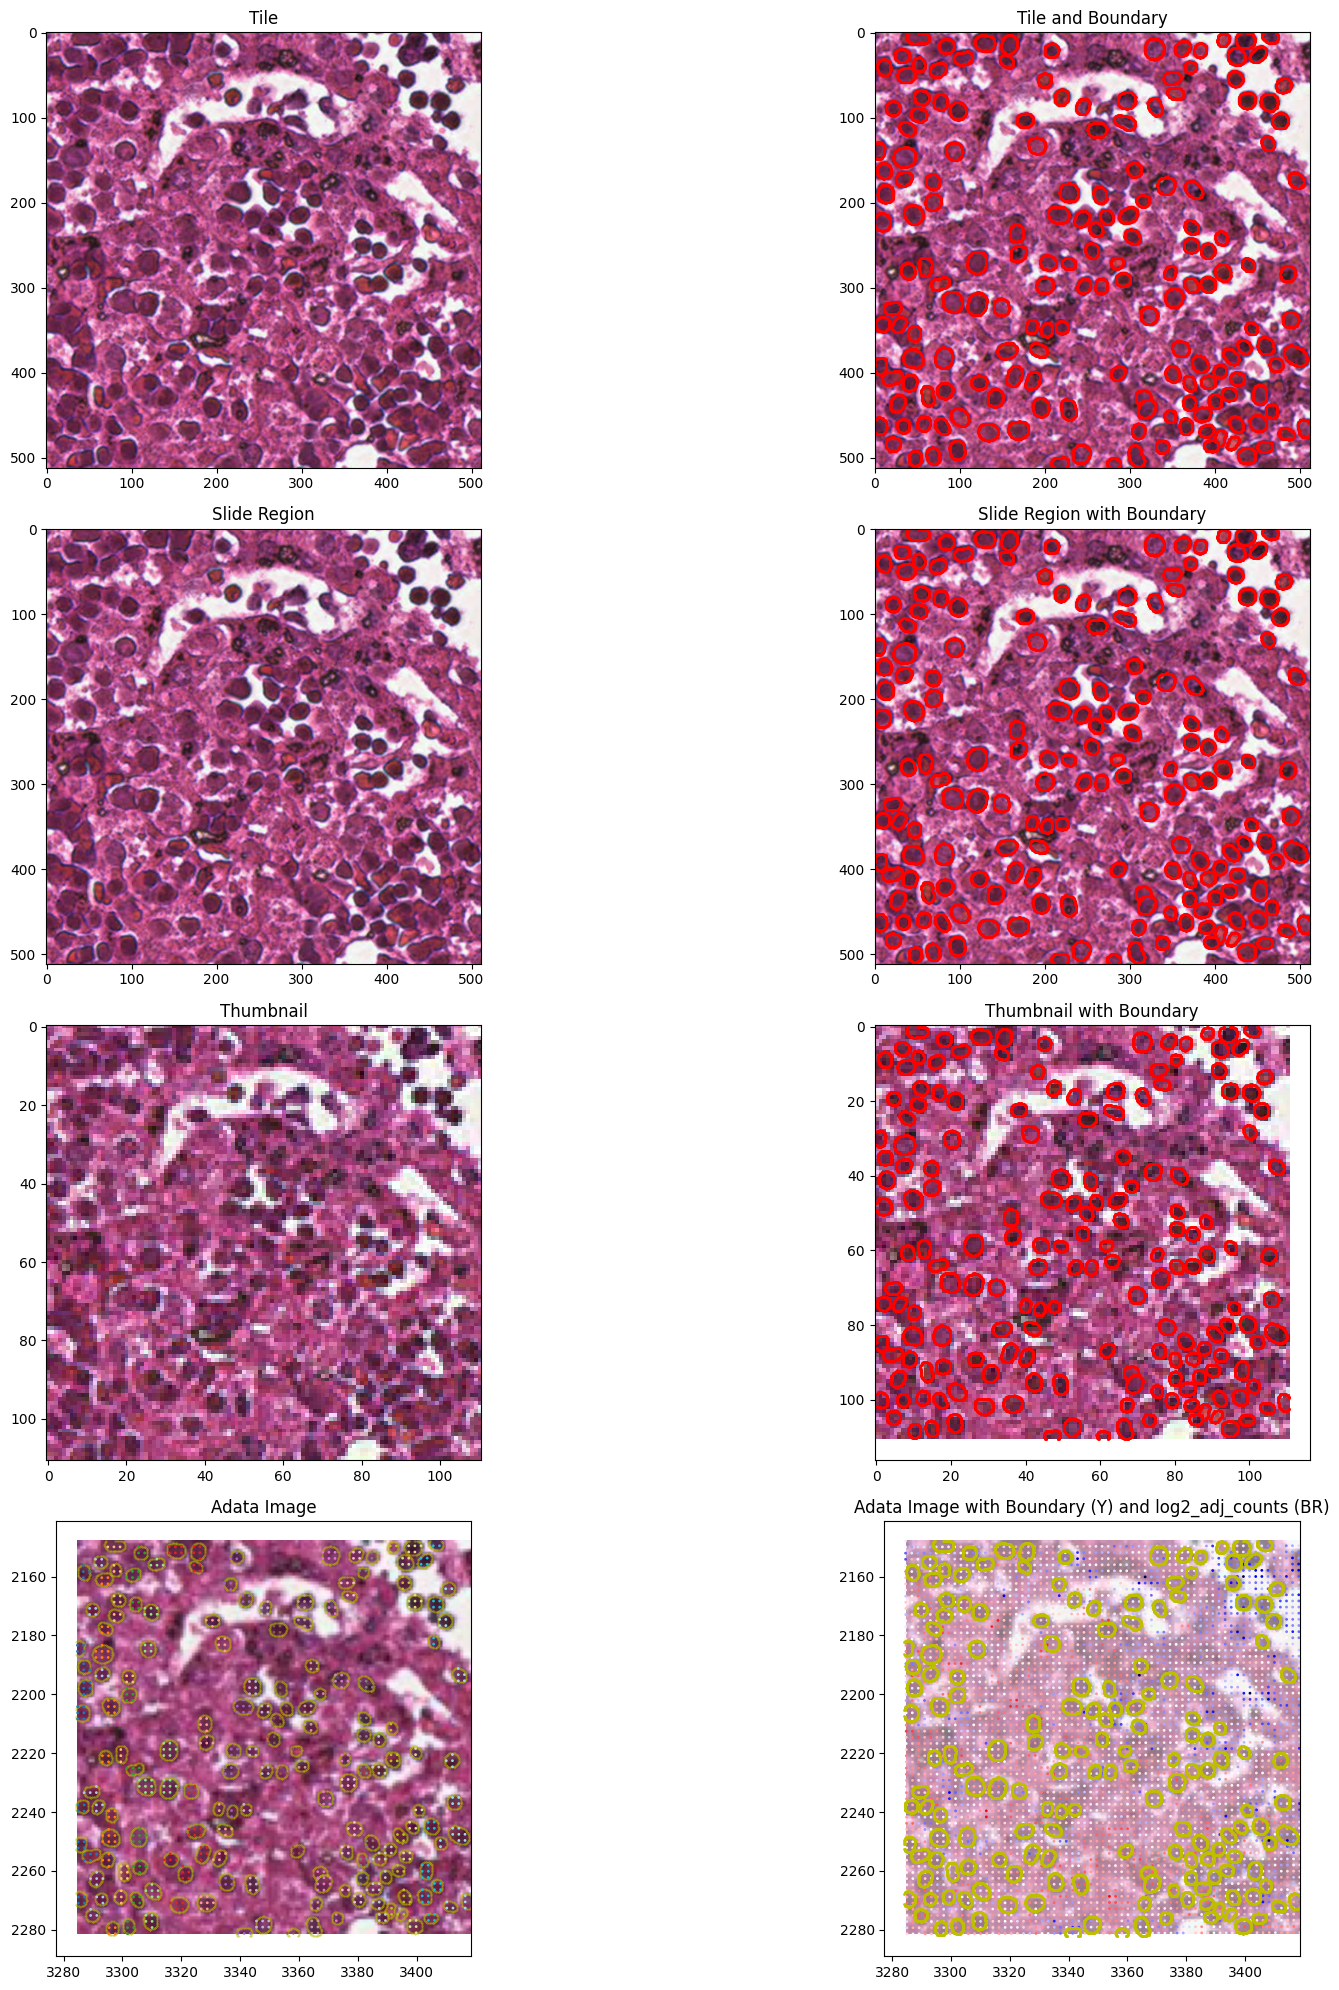

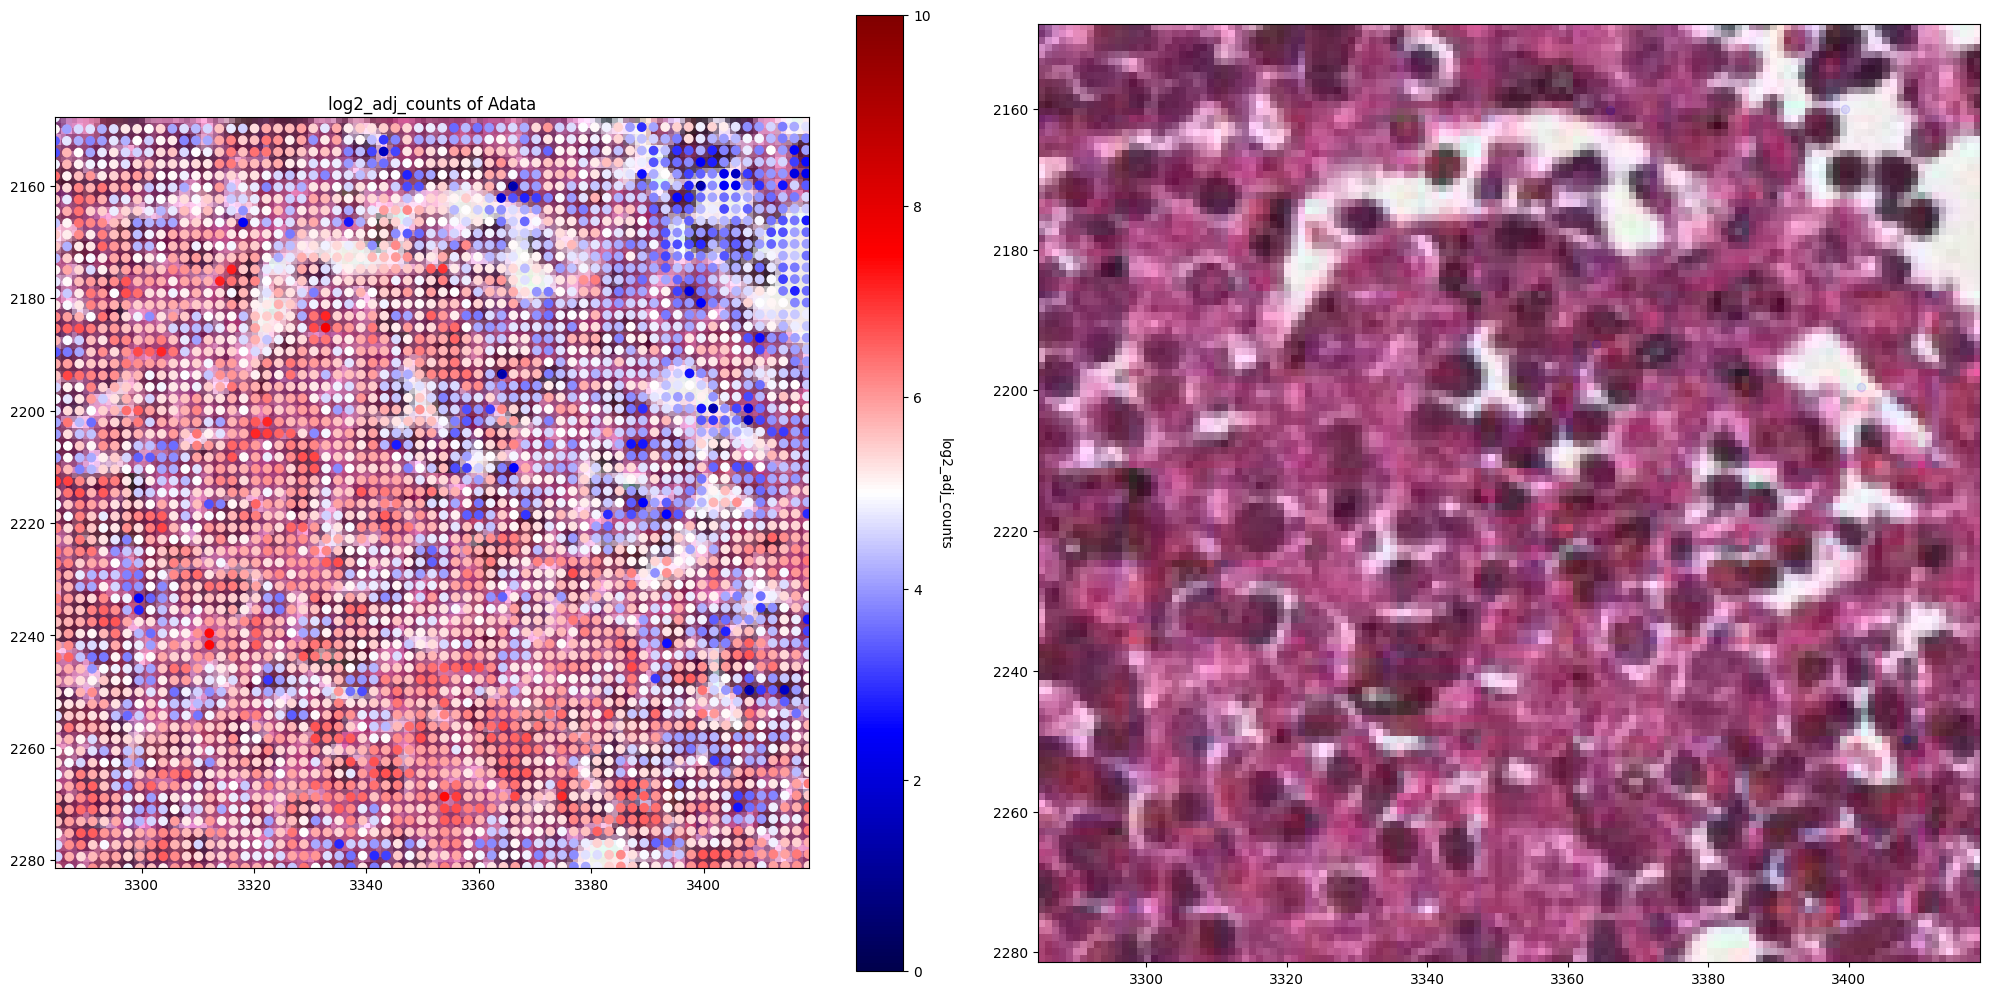

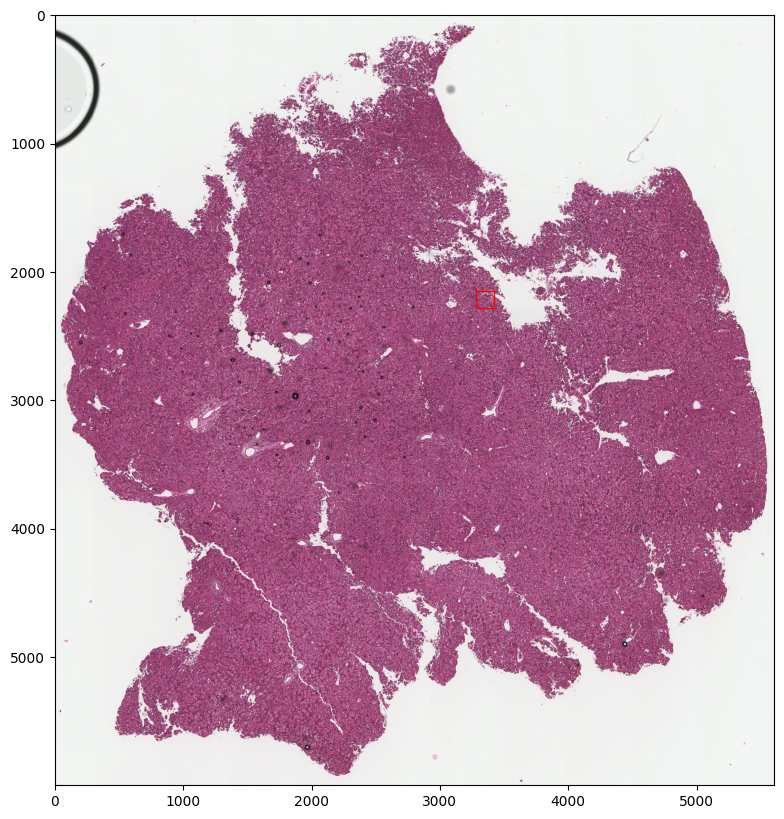

In [40]:
from PIL import PngImagePlugin

# Set large read permission for png files
LARGE_ENOUGH_NUMBER = 100
PngImagePlugin.MAX_TEXT_CHUNK = LARGE_ENOUGH_NUMBER * (1024**2)

adata_subset = map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_high_res_boundary_to_adata_obs_cell_bounds(

    *map_boundary_to_adata.one_example_tile_boundary_with_tile(idx=10),
    slide=premaping.slide,
    slide_thumbnail=premaping.slide_thumbnail,
    adata=adata,
    adata_image=premaping.adata_image,
    homoglaphy_matrix=premaping.homography_matrix,
    new_obs_cell_bounds_variable_name='cell_boundaries',
    default_cell_bounds='Not detected',
    verbose=True,
    return_adata_subset=True, 

)

In [41]:
adata_subset

View of AnnData object with n_obs × n_vars = 4161 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spatial_sample_id', 'cell_boundaries', 'spatial_x', 'spatial_y', 'spatial_x_scaled', 'spatial_y_scaled', 'cell_bounds', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'destripe_factor', 'n_counts_adjusted', 'log2_adj_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [45]:
import scanpy as sc


sc.pp.highly_variable_genes(adata, n_top_genes=100, )


In [46]:
top_genes_adata = adata[:, adata.var.highly_variable]


In [49]:
top_genes_adata.obs.head()

in_tissue  array_row  array_col spatial_sample_id  \
s_002um_02058_00301-1          1       2058        301   ELWA02_FL3_0_v1   
s_002um_02043_00141-1          1       2043        141   ELWA02_FL3_0_v1   
s_002um_02278_00850-1          1       2278        850   ELWA02_FL3_0_v1   
s_002um_01729_00511-1          1       1729        511   ELWA02_FL3_0_v1   
s_002um_01151_00627-1          1       1151        627   ELWA02_FL3_0_v1   

                      cell_boundaries    spatial_x    spatial_y  \
s_002um_02058_00301-1    Not detected  6411.270474  4863.828952   
s_002um_02043_00141-1    Not detected  6834.094068  4822.696606   
s_002um_02278_00850-1    Not detected  4961.992190  5450.467414   
s_002um_01729_00511-1    Not detected  5853.107242  3996.078125   
s_002um_01151_00627-1    Not detected  5541.140338  2469.208143   

                       spatial_x_scaled  spatial_y_scaled cell_bounds  ...  \
s_002um_02058_00301-1       5062.861685       3840.875743         NaN  ...   
s_002um_02043_00141-1       5396.757655       3808.394290         NaN  ...   
s_002um_02278_00850-1       3918.393436       4304.133283         NaN  ...   
s_002um_01729_00511-1       4622.090507       3155.628968         NaN  ...   
s_002um_01151_00627-1       4375.736014       1949.887990         NaN  ...   

                       log1p_n_genes_by_counts  total_counts  \
s_002um_02058_00301-1                 2.772589          16.0   
s_002um_02043_00141-1                 3.465736          39.0   
s_002um_02278_00850-1                 1.945910           6.0   
s_002um_01729_00511-1                 3.663562          39.0   
s_002um_01151_00627-1                 1.945910           8.0   

                       log1p_total_counts  pct_counts_in_top_50_genes  \
s_002um_02058_00301-1            2.833213                       100.0   
s_002um_02043_00141-1            3.688879                       100.0   
s_002um_02278_00850-1            1.945910                       100.0   
s_002um_01729_00511-1            3.688879                       100.0   
s_002um_01151_00627-1            2.197225                       100.0   

                       pct_counts_in_top_100_genes  \
s_002um_02058_00301-1                        100.0   
s_002um_02043_00141-1                        100.0   
s_002um_02278_00850-1                        100.0   
s_002um_01729_00511-1                        100.0   
s_002um_01151_00627-1                        100.0   

                       pct_counts_in_top_200_genes  \
s_002um_02058_00301-1                        100.0   
s_002um_02043_00141-1                        100.0   
s_002um_02278_00850-1                        100.0   
s_002um_01729_00511-1                        100.0   
s_002um_01151_00627-1                        100.0   

                       pct_counts_in_top_500_genes  destripe_factor  \
s_002um_02058_00301-1                        100.0         0.230474   
s_002um_02043_00141-1                        100.0         0.526726   
s_002um_02278_00850-1                        100.0         0.191896   
s_002um_01729_00511-1                        100.0         0.579576   
s_002um_01151_00627-1                        100.0         0.123002   

                       n_counts_adjusted  log2_adj_counts  
s_002um_02058_00301-1          21.434112         4.487622  
s_002um_02043_00141-1          48.985562         5.643440  
s_002um_02278_00850-1          17.846309         4.236210  
s_002um_01729_00511-1          53.900523         5.778748  
s_002um_01151_00627-1          11.439203         3.636822  

[5 rows x 21 columns]

In [52]:
import anndata
import pandas as pd

def convert_adata_to_parquet(
        adata: Anndata.adata,
        obs_columns: list[str] = None,
)->pd.DataFrame:
    expression_df = adata.to_df()
    if obs_columns:
        for obs_column in obs_columns:
            if obs_column in adata.obs.columns:
                expression_df[obs_column] = adata.obs[obs_column].values
            else:
                print(f"Warning: {obs_column} not found in adata.obs")


    return expression_df


expression_df = convert_adata_to_parquet(top_genes_adata,obs_columns=['array_row', 'array_col', 'cell_boundaries'] )



In [53]:
expression_df.head()

TPRG1L  EIF4G3  NSUN4  DR1  NOTCH2  CA14  SELENBP1  \
s_002um_02058_00301-1     0.0     0.0    0.0  0.0     0.0   0.0       0.0   
s_002um_02043_00141-1     0.0     0.0    0.0  0.0     0.0   0.0       0.0   
s_002um_02278_00850-1     0.0     0.0    0.0  0.0     0.0   0.0       0.0   
s_002um_01729_00511-1     0.0     0.0    0.0  0.0     0.0   0.0       0.0   
s_002um_01151_00627-1     0.0     0.0    0.0  0.0     0.0   0.0       0.0   

                       SLC27A3  PPOX  CREG1  ...     BACH1  GUCD1  LMF2  \
s_002um_02058_00301-1      0.0   0.0    0.0  ...  1.339632    0.0   0.0   
s_002um_02043_00141-1      0.0   0.0    0.0  ...  0.000000    0.0   0.0   
s_002um_02278_00850-1      0.0   0.0    0.0  ...  0.000000    0.0   0.0   
s_002um_01729_00511-1      0.0   0.0    0.0  ...  0.000000    0.0   0.0   
s_002um_01151_00627-1      0.0   0.0    0.0  ...  0.000000    0.0   0.0   

                         TMSB4X  BEX3  UBE2A  MT-CO3  array_row  array_col  \
s_002um_02058_00301-1  0.000000   0.0    0.0     0.0       2058        301   
s_002um_02043_00141-1  0.000000   0.0    0.0     0.0       2043        141   
s_002um_02278_00850-1  0.000000   0.0    0.0     0.0       2278        850   
s_002um_01729_00511-1  1.382065   0.0    0.0     0.0       1729        511   
s_002um_01151_00627-1  0.000000   0.0    0.0     0.0       1151        627   

                       cell_boundaries  
s_002um_02058_00301-1     Not detected  
s_002um_02043_00141-1     Not detected  
s_002um_02278_00850-1     Not detected  
s_002um_01729_00511-1     Not detected  
s_002um_01151_00627-1     Not detected  

[5 rows x 103 columns]

In [54]:
# First, reset the index to make the cell identifier a column
expression_df_reset = expression_df.reset_index().rename(columns={'index': 'cell_id'})

# Identify the gene columns (all columns except your obs_columns and the new cell_id)
gene_columns = [col for col in expression_df.columns if col not in ['array_row', 'array_col', 'cell_boundaries']]

# Use pd.melt to unpivot the DataFrame
long_format_df = pd.melt(
    expression_df_reset,
    id_vars=['cell_id', 'array_row', 'array_col', 'cell_boundaries'],
    value_vars=gene_columns,
    var_name='gene_name',
    value_name='expression'
)

# Display the first few rows of the new DataFrame
print(long_format_df.head())

                 cell_id  array_row  array_col cell_boundaries gene_name  \
0  s_002um_02058_00301-1       2058        301    Not detected    TPRG1L   
1  s_002um_02043_00141-1       2043        141    Not detected    TPRG1L   
2  s_002um_02278_00850-1       2278        850    Not detected    TPRG1L   
3  s_002um_01729_00511-1       1729        511    Not detected    TPRG1L   
4  s_002um_01151_00627-1       1151        627    Not detected    TPRG1L   

   expression  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  


In [58]:
long_format_df = long_format_df.loc[long_format_df['expression']>1]
long_format_df['cell_boundaries'] = long_format_df['cell_boundaries'].apply(
    lambda x: "0" if x == 'Not detected' else str(x)
)

In [59]:
long_format_df.head()

cell_id  array_row  array_col cell_boundaries gene_name  \
239   s_002um_02592_00496-1       2592        496               0    TPRG1L   
627   s_002um_01271_00771-1       1271        771               0    TPRG1L   
749   s_002um_01632_01855-1       1632       1855               0    TPRG1L   
2182  s_002um_02577_01083-1       2577       1083               0    TPRG1L   
2329  s_002um_01221_01884-1       1221       1884               0    TPRG1L   

      expression  
239     1.389495  
627     1.224469  
749     1.104374  
2182    1.043313  
2329    1.300301

In [60]:
long_format_df.shape

(4024725, 6)

In [65]:
saving_parquet_f = Path('./outputs/baysor/baysor.parquet')
saving_parquet_f.parent.mkdir(parents=True, exist_ok=True)

In [67]:
long_format_df['z'] = 0

In [68]:
long_format_df[['array_row', 'array_col','z', 'gene_name','cell_boundaries']].to_parquet(saving_parquet_f)

In [77]:
import subprocess

baysor_path = '/dfs9/stanlewn-lab/share/Elvin_Single_Cell_References/baysor/cli/bin/baysor/bin/baysor'
baysor_path = './baysor'
baysor_path = './baysor previw'
baysor_path = './baysor preview'

command = [
    baysor_path,
    str(saving_parquet_f.absolute()),
    '-x', 'array_row',
    '-y', 'array_col',
    '-z', 'z',
    '-g', 'gene_name',
    # '--prior-segmentation-confidence', '0.5',
    ':cell_boundaries',
    # '-p',
    '-o', '/dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/notebooks/outputs/baysor'
]


print(' '.join(command))


./baysor preview /dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/notebooks/outputs/baysor/baysor.parquet -x array_row -y array_col -z z -g gene_name :cell_boundaries -p -o /dfs6/pub/boyaz14/elvin_visium_hd/Capabarab_hd/notebooks/outputs/baysor


In [42]:
adata_subset.obs['cell_boundaries']

s_002um_01250_01123-1    Not detected
s_002um_01255_01093-1    Not detected
s_002um_01302_01133-1    Not detected
s_002um_01284_01122-1    Not detected
s_002um_01252_01113-1    Not detected
                             ...     
s_002um_01284_01119-1    Not detected
s_002um_01306_01130-1    Not detected
s_002um_01273_01120-1    Not detected
s_002um_01272_01146-1    Not detected
s_002um_01291_01144-1    Not detected
Name: cell_boundaries, Length: 4161, dtype: object

In [ ]:
process_tile = ProcessTile(
    slide_f=histology_f,
)
analyze_folder = process_tile.analyze_folder

boundary_predictions_folder = analyze_folder / 'nucleus_predictions'
tiles_folder = analyze_folder / f'{analyze_folder.stem}_tiles'
debug_folder = analyze_folder / 'nucleus_predictions_debug'
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(boundary_predictions_folder)
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(tiles_folder)
# map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(debug_folder,)
map_boundary_to_adata = map_cell_boundary_from_ultra_high_res_histology_to_adata(
    analyze_folder=analyze_folder,
    slide=slide,
    # slide_thumbnail=slide_thumbnail,
)

new_obs_column = 'cell_bounds'
default_value = 'not_detected'


adata.obs[new_obs_column] = default_value
# adata.obs['cell_bounds'] = 'not_detected'

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_high_res_boundary_to_adata_obs_cell_bounds(

    *map_boundary_to_adata.one_example_tile_boundary_with_tile(idx=10),
    slide=slide,
    slide_thumbnail=slide_thumbnail,
    adata=adata,
    adata_image=adata_image,
    homoglaphy_matrix=h,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,

)

boundary_files, tile_files = map_boundary_to_adata.get_all_boundary_tile_files()
# boundary_files, tile_files

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_mutliple_high_res_boundary_to_adata_obs_cell_bounds(

    boundary_files,
    tile_files,
    slide,
    slide_thumbnail,
    adata,
    adata_image,
    h,
    save_adata_folder=analyze_folder,
    save_adata_suffix=elvin_fl3.out_10x_name,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,
    plot_comprehensively_count=5,
    save_comprehensively_folder=analyze_folder / 'cell_bounds_plots_comprehensive_debug',
    force=True,
    # debug=True,
)

In [ ]:
img_key = [k for k in adata.uns['spatial'].keys()][0]
adata_image_from_h5ad = adata.uns['spatial'][img_key]['images']['hires']
# Normalize to 0-255 range
normalized_image = ((adata_image_from_h5ad - adata_image_from_h5ad.min()) * 255.0 /
                   (adata_image_from_h5ad.max() - adata_image_from_h5ad.min()))
# Convert to uint8
uint8_image = normalized_image.astype(np.uint8)

# If needed, reshape to remove singleton dimensions
if uint8_image.shape[0] == 1 and uint8_image.shape[1] == 1:
    uint8_image = uint8_image.squeeze()

# Now convert to PIL Image
adata_image = Image.fromarray(uint8_image)


# very small subset need the high resolution histology image
slide = openslide.OpenSlide(slide_f)
slide_thumbnail = slide.get_thumbnail(

    (adata_image.width, adata_image.height)
)



adata_image_array = np.array(adata_image)
adata_image_array_gray = rgb2gray(adata_image)
thumbnail_array_gray = rgb2gray(slide_thumbnail)

# Our images are already in grayscale, but let's ensure they're in the right format for OpenCV
adata_gray = (adata_image_array_gray * 255).astype(np.uint8)
thumbnail_gray = (thumbnail_array_gray * 255).astype(np.uint8)

# Detect ORB features and compute descriptors
MAX_NUM_FEATURES = 2000  # Increased for more features
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(adata_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(thumbnail_gray, None)

# Draw keypoints on images
adata_display = cv2.drawKeypoints(adata_gray, keypoints1,
                                 outImage=np.array([]),
                                 color=(255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

thumbnail_display = cv2.drawKeypoints(thumbnail_gray, keypoints2,
                                    outImage=np.array([]),
                                    color=(255, 0, 0),
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display Images with keypoints
plt.figure(figsize=[20, 10])
plt.subplot(2, 2, 1)
plt.axis("off")
plt.imshow(adata_display, cmap='gray')
plt.title("10X Image with Keypoints")

plt.subplot(2, 2, 2)
plt.axis("off")
plt.imshow(thumbnail_display, cmap='gray')
plt.title("Thumbnail (Whole Slide) with Keypoints")

plt.subplot(2, 2, 3)
plt.axis("off")
plt.imshow(adata_image)
plt.title("10X Image")

plt.subplot(2, 2, 4)
plt.axis("off")
plt.imshow(slide_thumbnail)
plt.title("Thumbnail (Whole Slide) Image")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("10X Image and WSI Image (make sure the four image are very similar)")
plt.show()